In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/noamshayer/DataAnalistProject/main/Affairs.csv'
affairs_df = pd.read_csv(url)
#affairs_df.head()

In [3]:
del affairs_df[affairs_df.columns[0]]
affairs_df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.00,no,3,18,7,4
1,0,female,27.0,4.00,no,4,14,6,4
2,0,female,32.0,15.00,yes,1,12,1,4
3,0,male,57.0,15.00,yes,5,18,6,5
4,0,male,22.0,0.75,no,2,17,6,3


In [4]:
affairs_df['index'] = range(0, len(affairs_df))
new_affairs=affairs_df.copy(deep=True)


In [5]:
new_affairs['age']=new_affairs['age'].astype(str)
new_affairs['yearsmarried']=new_affairs['yearsmarried'].astype(str)
new_affairs['affairs']=new_affairs['affairs'].astype(str)
new_affairs['education']=new_affairs['education'].astype(str)
new_affairs['rating']=new_affairs['rating'].astype(str)
new_affairs['occupation']=new_affairs['occupation'].astype(str)
new_affairs['religiousness']=new_affairs['religiousness'].astype(str)
new_affairs.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,index
0,0,male,37.0,10.0,no,3,18,7,4,0
1,0,female,27.0,4.0,no,4,14,6,4,1
2,0,female,32.0,15.0,yes,1,12,1,4,2
3,0,male,57.0,15.0,yes,5,18,6,5,3
4,0,male,22.0,0.75,no,2,17,6,3,4


In [6]:
new_affairs['age']=new_affairs['age'].replace({"37.0":"35-39","17.5":"Under 20","22.0":"20-24","27.0":"25-29","32.0":"30-34","42.0":"40-44","47.0":"45-49","52.0":"50-54","57.0":"55+"})
new_affairs['affairs']=new_affairs['affairs'].replace({"0":"none","1":"once","2":"twice","3":"3 times","7":"4-10 times","12":"monthly, weekly or daily"})
new_affairs['yearsmarried']=new_affairs['yearsmarried'].replace({"0.125":"3 months or less","0.417":"4-6 months","0.75":"6 months-1 year","1.5":"1-2 years","4.0":"3-5 years","7.0":"6-8 years","10.0":"9-11 years","15.0":"12+ years"})
new_affairs['religiousness']=new_affairs['religiousness'].replace({"1":"anti","2":"not at all","3":"slightly","4":"somewhat","5":"very"})
new_affairs['education']=new_affairs['education'].replace({"9":"grade school","12":"high school graduate","14":"some college","16":"college graduate","17":" some graduate work","18":"master's degree","20":"advanced degree"})
new_affairs['rating']=new_affairs['rating'].replace({"1":"very unhappy","2":"somewhat unhappy","3":"average","4":"happier than average","5":"very happy"})
new_affairs

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,index
0,none,male,35-39,9-11 years,no,slightly,master's degree,7,happier than average,0
1,none,female,25-29,3-5 years,no,somewhat,some college,6,happier than average,1
2,none,female,30-34,12+ years,yes,anti,high school graduate,1,happier than average,2
3,none,male,55+,12+ years,yes,very,master's degree,6,very happy,3
4,none,male,20-24,6 months-1 year,no,not at all,some graduate work,6,average,4
...,...,...,...,...,...,...,...,...,...,...
596,once,male,20-24,1-2 years,yes,anti,high school graduate,2,very happy,596
597,4-10 times,female,30-34,9-11 years,yes,not at all,master's degree,5,happier than average,597
598,twice,male,30-34,9-11 years,yes,not at all,some graduate work,6,very happy,598
599,twice,male,20-24,6-8 years,yes,slightly,master's degree,6,somewhat unhappy,599


Delete the first column

In [7]:
new_affairs.isnull().sum().sort_values(ascending=False)

affairs          0
gender           0
age              0
yearsmarried     0
children         0
religiousness    0
education        0
occupation       0
rating           0
index            0
dtype: int64

We can see that there is not empty spots.

In [8]:
features=["affairs","gender","age","yearsmarried","children","religiousness","education","occupation","rating"]

In [9]:
melt_affairs=new_affairs.melt(id_vars="index",value_vars=features)
melt_affairs

,index,variable,value
0,0,affairs,none
1,1,affairs,none
2,2,affairs,none
3,3,affairs,none
4,4,affairs,none
...,...,...,...
5404,596,rating,very happy
5405,597,rating,happier than average
5406,598,rating,very happy
5407,599,rating,somewhat unhappy


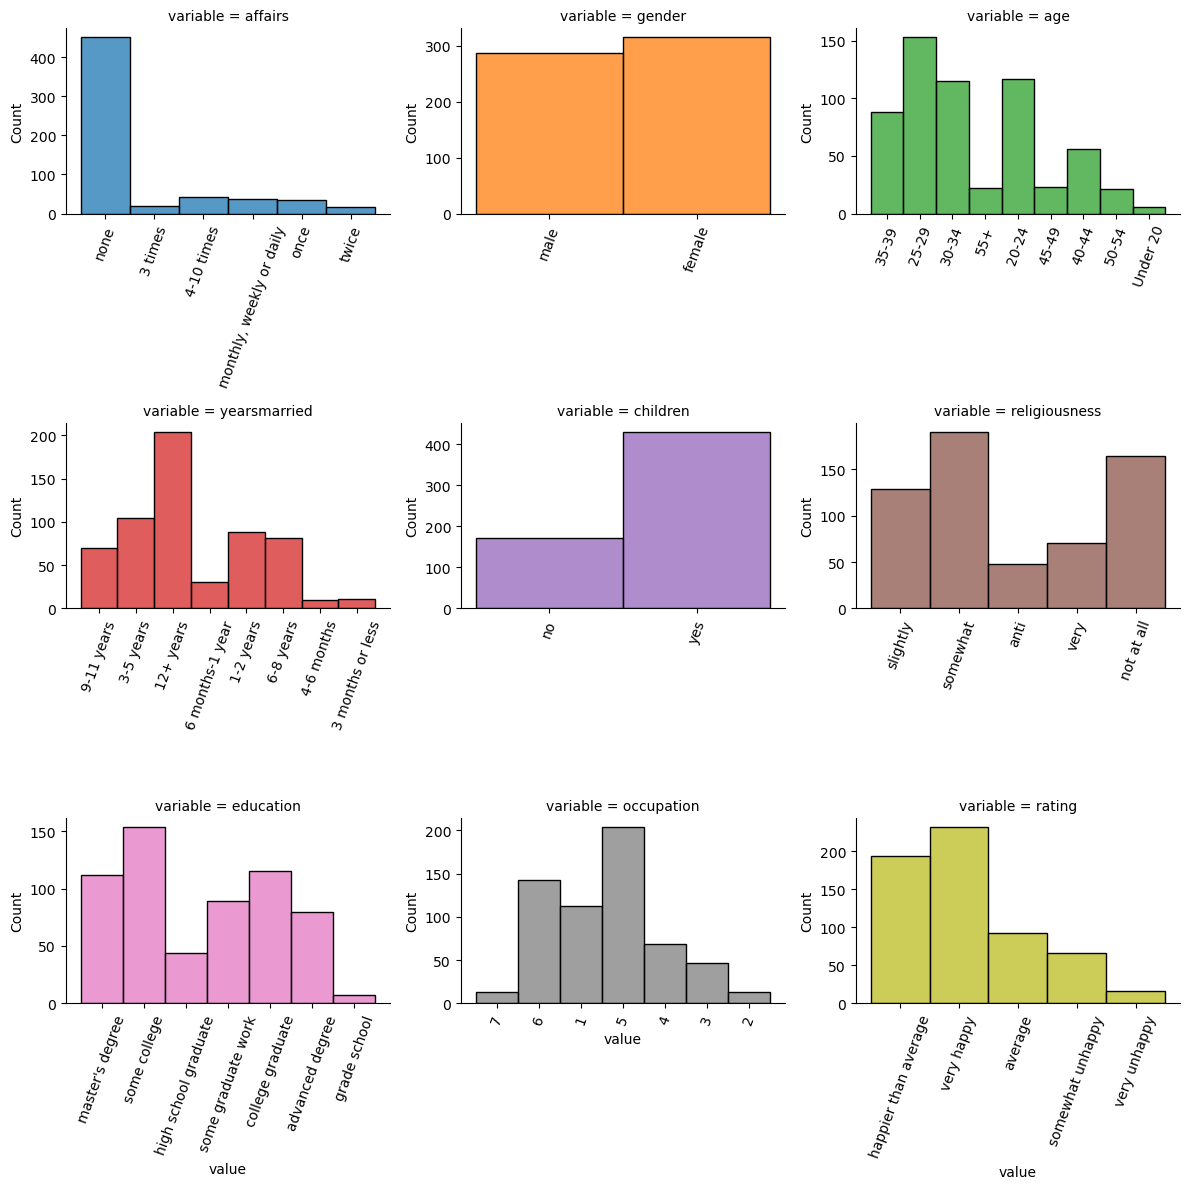

In [10]:
affairs_histplots = sns.FacetGrid(melt_affairs, col="variable", hue="variable", col_wrap=3, sharex=False,sharey=False, height = 4)
affairs_histplots.map_dataframe(sns.histplot, x = 'value')
affairs_histplots.set_xticklabels(rotation=70)
plt.tight_layout()

plt.show()

In [11]:
features=["affairs","gender","age","yearsmarried","children","religiousness","education","occupation","rating"]

In [12]:
affairs_dummies = pd.get_dummies(affairs_df[features])
affairs_dummies

,affairs,age,yearsmarried,religiousness,education,occupation,rating,gender_female,gender_male,children_no,children_yes
0,0,37.0,10.00,3,18,7,4,0,1,1,0
1,0,27.0,4.00,4,14,6,4,1,0,1,0
2,0,32.0,15.00,1,12,1,4,1,0,0,1
3,0,57.0,15.00,5,18,6,5,0,1,0,1
4,0,22.0,0.75,2,17,6,3,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
596,1,22.0,1.50,1,12,2,5,0,1,0,1
597,7,32.0,10.00,2,18,5,4,1,0,0,1
598,2,32.0,10.00,2,17,6,5,0,1,0,1
599,2,22.0,7.00,3,18,6,2,0,1,0,1


In [13]:
correlation_matrix = affairs_dummies.corr().round(2)
correlation_matrix

,affairs,age,yearsmarried,religiousness,education,occupation,rating,gender_female,gender_male,children_no,children_yes
affairs,1.00,0.10,0.19,-0.14,-0.00,0.05,-0.28,-0.01,0.01,-0.10,0.10
age,0.10,1.00,0.78,0.19,0.13,0.17,-0.20,-0.19,0.19,-0.42,0.42
yearsmarried,0.19,0.78,1.00,0.22,0.04,0.04,-0.24,-0.03,0.03,-0.57,0.57
religiousness,-0.14,0.19,0.22,1.00,-0.04,-0.04,0.02,-0.01,0.01,-0.13,0.13
education,-0.00,0.13,0.04,-0.04,1.00,0.53,0.11,-0.40,0.40,0.01,-0.01
occupation,0.05,0.17,0.04,-0.04,0.53,1.00,0.02,-0.47,0.47,0.09,-0.09
rating,-0.28,-0.20,-0.24,0.02,0.11,0.02,1.00,0.01,-0.01,0.20,-0.20
gender_female,-0.01,-0.19,-0.03,-0.01,-0.40,-0.47,0.01,1.00,-1.00,0.07,-0.07
gender_male,0.01,0.19,0.03,0.01,0.40,0.47,-0.01,-1.00,1.00,-0.07,0.07
children_no,-0.10,-0.42,-0.57,-0.13,0.01,0.09,0.20,0.07,-0.07,1.00,-1.00


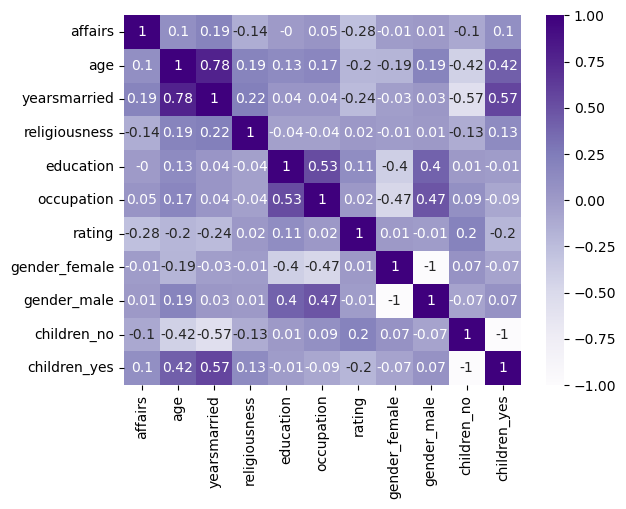

In [14]:
sns.heatmap(data=correlation_matrix,cmap='Purples', annot=True)
plt.show()

In [15]:
newnew=affairs_df.copy(deep=True)
newnew['affairs']=newnew['affairs'].astype(str)
newnew['affairs']=newnew['affairs'].replace({"0":"none","1":"once","2":"twice","3":"3 times","7":"4-10 times","12":"monthly, weekly or daily"})

In [16]:
affairs_dummies2 = pd.get_dummies(newnew[features])


In [17]:
correlation_matrix2 = affairs_dummies2.corr().round(2)


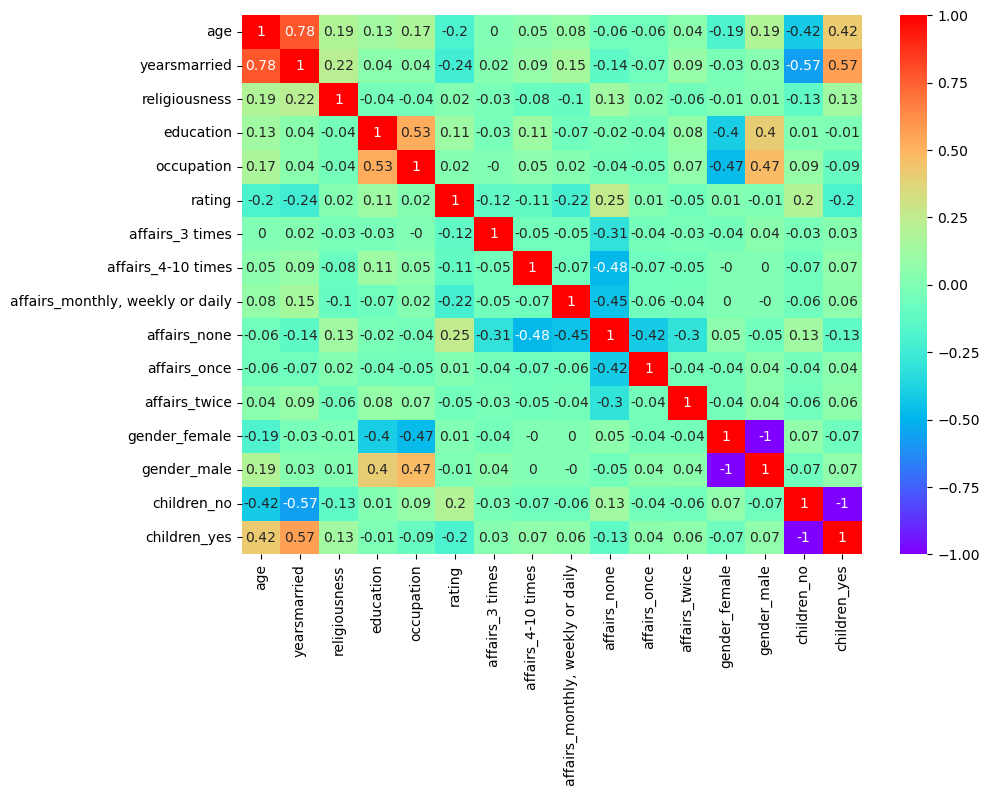

In [18]:
plt.figure(figsize=(10,7))  
sns.heatmap(data=correlation_matrix2,cmap='rainbow', annot=True)
plt.show()

In [19]:
#sns.countplot(data = new_affairs, x = 'affairs', hue = 'rating').tick_params(axis='x',rotation=90)
#plt.show()

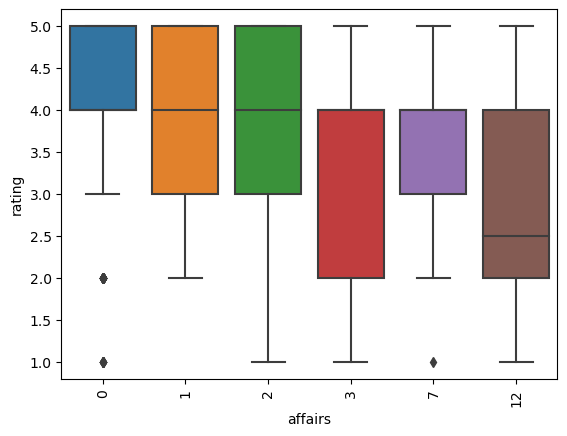

In [20]:
sns.boxplot(data = affairs_df, x = 'affairs', y = 'rating').tick_params(axis='x',rotation=90)
plt.show()

In [21]:
x_value = 7  # The specific value of x for which you want to find the median
subset_data = affairs_df[affairs_df['affairs'] == x_value]
median_value = subset_data['rating'].median()

print("Median for x = 1:", median_value)

Median for x = 1: 4.0


ניתן לראות לפי השרטוט של הבוקספלוט שאנשים שלא ניהלו רומן מדרגים את חיי הנישואים שלהם דירוג גבוה. ובצד השני הפוך, אנשים שמנהלים רומן באופן קבוע מדרגים את חיי הנישואים שלהם נמוך

In [22]:
only_affairs=affairs_df.loc[affairs_df.affairs!=0]
only_affairs

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,index
451,3,male,27.0,1.500,no,3,18,4,4,451
452,3,female,27.0,4.000,yes,3,17,1,5,452
453,7,male,37.0,15.000,yes,5,18,6,2,453
454,12,female,32.0,10.000,yes,3,17,5,2,454
455,1,male,22.0,0.125,no,4,16,5,5,455
...,...,...,...,...,...,...,...,...,...,...
596,1,male,22.0,1.500,yes,1,12,2,5,596
597,7,female,32.0,10.000,yes,2,18,5,4,597
598,2,male,32.0,10.000,yes,2,17,6,5,598
599,2,male,22.0,7.000,yes,3,18,6,2,599


In [23]:
only_affairs_dummies = pd.get_dummies(only_affairs[features])
only_affairs_dummies

,affairs,age,yearsmarried,religiousness,education,occupation,rating,gender_female,gender_male,children_no,children_yes
451,3,27.0,1.500,3,18,4,4,0,1,1,0
452,3,27.0,4.000,3,17,1,5,1,0,0,1
453,7,37.0,15.000,5,18,6,2,0,1,0,1
454,12,32.0,10.000,3,17,5,2,1,0,0,1
455,1,22.0,0.125,4,16,5,5,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
596,1,22.0,1.500,1,12,2,5,0,1,0,1
597,7,32.0,10.000,2,18,5,4,1,0,0,1
598,2,32.0,10.000,2,17,6,5,0,1,0,1
599,2,22.0,7.000,3,18,6,2,0,1,0,1


In [24]:
correlation_matrix2 = only_affairs_dummies.corr().round(2)
correlation_matrix2

,affairs,age,yearsmarried,religiousness,education,occupation,rating,gender_female,gender_male,children_no,children_yes
affairs,1.00,0.17,0.27,-0.14,-0.05,0.07,-0.24,0.08,-0.08,-0.01,0.01
age,0.17,1.00,0.76,0.07,0.23,0.18,-0.07,-0.10,0.10,-0.29,0.29
yearsmarried,0.27,0.76,1.00,0.19,0.12,0.12,-0.19,0.06,-0.06,-0.39,0.39
religiousness,-0.14,0.07,0.19,1.00,-0.10,-0.09,-0.01,0.05,-0.05,-0.13,0.13
education,-0.05,0.23,0.12,-0.10,1.00,0.58,0.17,-0.39,0.39,-0.08,0.08
occupation,0.07,0.18,0.12,-0.09,0.58,1.00,0.03,-0.47,0.47,-0.01,0.01
rating,-0.24,-0.07,-0.19,-0.01,0.17,0.03,1.00,-0.06,0.06,0.13,-0.13
gender_female,0.08,-0.10,0.06,0.05,-0.39,-0.47,-0.06,1.00,-1.00,-0.03,0.03
gender_male,-0.08,0.10,-0.06,-0.05,0.39,0.47,0.06,-1.00,1.00,0.03,-0.03
children_no,-0.01,-0.29,-0.39,-0.13,-0.08,-0.01,0.13,-0.03,0.03,1.00,-1.00


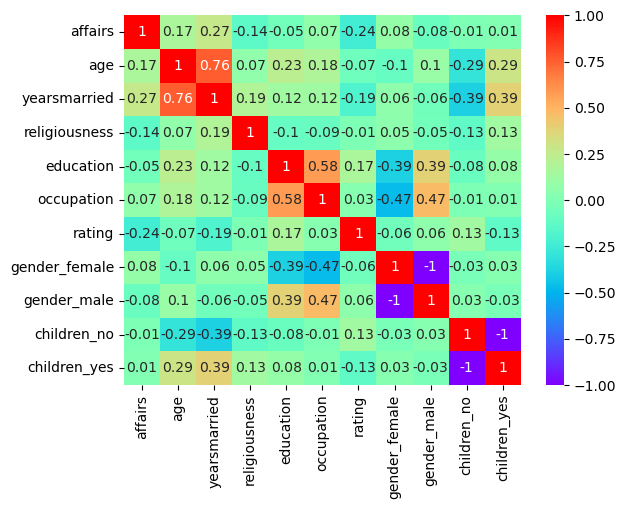

In [25]:
sns.heatmap(data=correlation_matrix2,cmap='rainbow', annot=True)
plt.show()

In [26]:
#sns.countplot(data = only_affairs, x = 'affairs', hue = 'rating').tick_params(axis='x',rotation=90)
#plt.show()

In [27]:
only_affairs2=new_affairs.loc[new_affairs.affairs!="none"]
only_affairs2

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,index
451,3 times,male,25-29,1-2 years,no,slightly,master's degree,4,happier than average,451
452,3 times,female,25-29,3-5 years,yes,slightly,some graduate work,1,very happy,452
453,4-10 times,male,35-39,12+ years,yes,very,master's degree,6,somewhat unhappy,453
454,"monthly, weekly or daily",female,30-34,9-11 years,yes,slightly,some graduate work,5,somewhat unhappy,454
455,once,male,20-24,3 months or less,no,somewhat,college graduate,5,very happy,455
...,...,...,...,...,...,...,...,...,...,...
596,once,male,20-24,1-2 years,yes,anti,high school graduate,2,very happy,596
597,4-10 times,female,30-34,9-11 years,yes,not at all,master's degree,5,happier than average,597
598,twice,male,30-34,9-11 years,yes,not at all,some graduate work,6,very happy,598
599,twice,male,20-24,6-8 years,yes,slightly,master's degree,6,somewhat unhappy,599


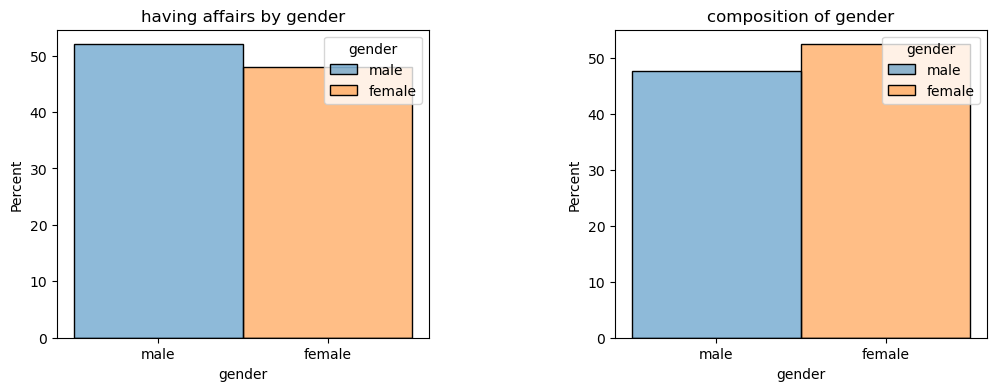

In [28]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize = (12,4))
plt.subplots_adjust(wspace = 0.5)

sns.histplot(data=only_affairs2, x ='gender',stat="percent",hue="gender",ax = ax1)
ax1.set_title("having affairs by gender")

sns.histplot(data=new_affairs, x ='gender',stat="percent",hue="gender",ax = ax2)
ax2.set_title("composition of gender")

plt.show()

The right diagram shows as the division between male and female who answer the survey, the left one shows us the division by the people who have an affair.
We can see that in the right diagram, the most of the people who answer the survey were female.
However,from the left diagerm we see that out of the group of people who have an affairs, the majority were male. 


In [29]:
#sns.histplot(data=only_affairs2, x ='rating').tick_params(axis='x',rotation=90)
#plt.show()

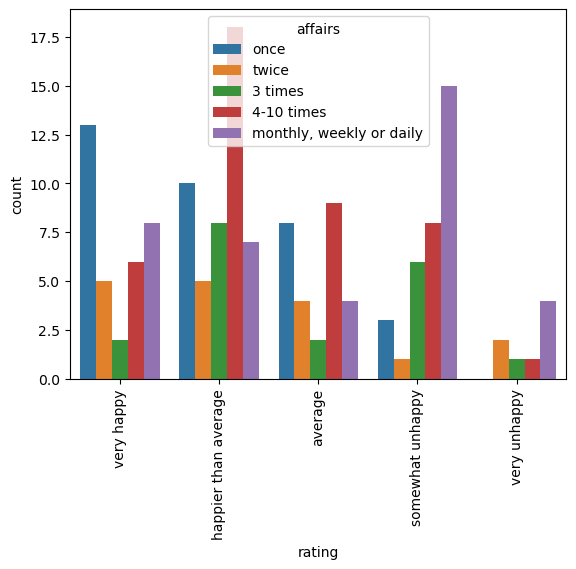

In [37]:
order=["very happy","happier than average","average","somewhat unhappy","very unhappy"]
hue_order=['once', 'twice', '3 times','4-10 times','monthly, weekly or daily']
sns.countplot(data = only_affairs2, x = 'rating', hue = 'affairs',order=order,hue_order=hue_order).tick_params(axis='x',rotation=90)
plt.show()

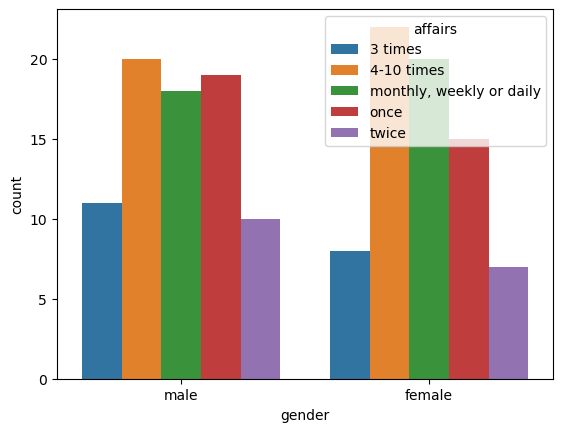

In [31]:
sns.countplot(data = only_affairs2, x = 'gender', hue = 'affairs')#.tick_params(axis='x',rotation=90)
plt.show()

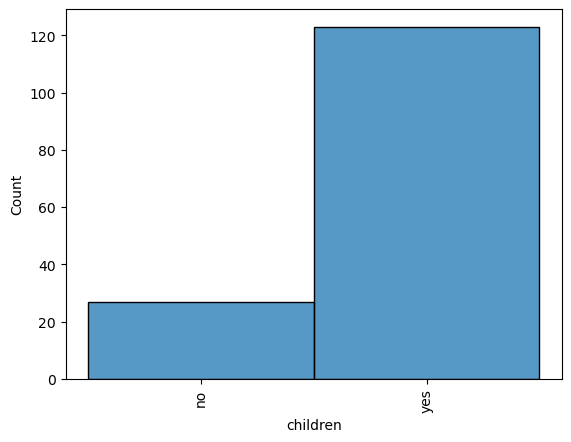

In [32]:
sns.histplot(data=only_affairs2, x ='children').tick_params(axis='x',rotation=90)
plt.show()

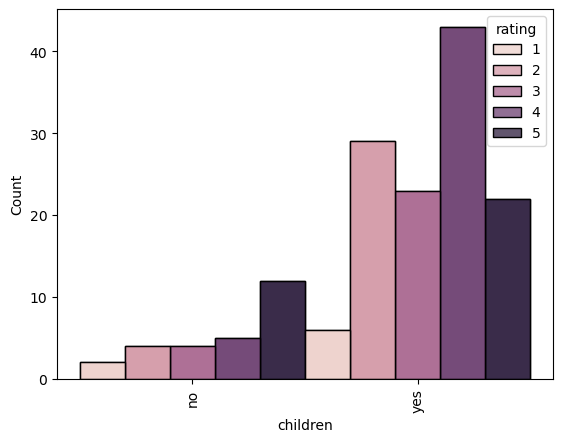

In [42]:
sns.histplot(data=only_affairs,x="children",hue="rating",multiple="dodge").tick_params(axis="x",rotation=90)
plt.show()

In [38]:
only_affairs_dummies["children_no"]=only_affairs_dummies["children_no"].replace(0,None)
only_affairs_dummies["children_yes"]=only_affairs_dummies["children_yes"].replace(0,None)


In [40]:
only_affairs_dummies_groupby=only_affairs_dummies.groupby(["rating"])[["children_no","children_yes"]].count()
only_affairs_dummies_groupby

,children_no,children_yes
rating,,
1,2,6
2,4,29
3,4,23
4,5,43
5,12,22
